In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import PIL.Image as Image
from PIL import ImageEnhance

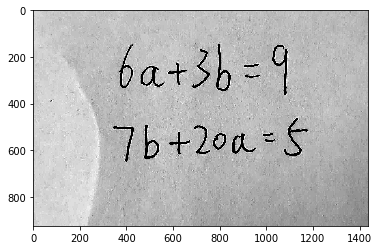

In [2]:
image = np.array(Image.open('test_image/98.jpg'))
GrayImage = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
enh_con = ImageEnhance.Contrast(Image.fromarray(GrayImage))
image_contrasted = enh_con.enhance(3)
enh_sha = ImageEnhance.Sharpness(image_contrasted)  # 增加锐度
image_sharped = enh_sha.enhance(3.0)
plt.imshow(image_sharped)

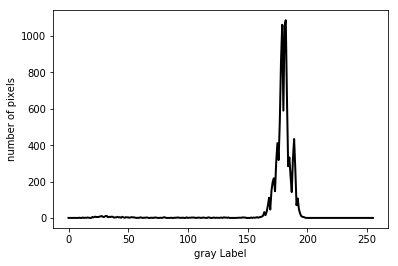

In [3]:
def calcGrayHist(I):
    # 计算灰度直方图
    h, w = I.shape[:2]
    I = np.array(Image.fromarray(GrayImage).resize((128,int(128*(h/w)))))
    h, w = I.shape[:2]
    grayHist = np.zeros([256], np.uint64)
    for i in range(h):
        for j in range(w):
            grayHist[I[i][j]] += 1
    return grayHist
grayHist = calcGrayHist(GrayImage)
x = np.arange(256)
# 绘制灰度直方图
plt.plot(x, grayHist, 'r', linewidth=2, c='black')
plt.xlabel("gray Label")
plt.ylabel("number of pixels")
plt.show()

In [4]:
def calcGrayHist(I):
    # 计算灰度直方图
    h, w = I.shape[:2]
    I = np.array(Image.fromarray(GrayImage).resize((128,int(128*(h/w)))))
    h, w = I.shape[:2]
    grayHist = np.zeros([256], np.uint64)
    theHightPoint = [0,0]#1.直方图纵坐标，2.直方图横坐标
    for i in range(h):
        for j in range(w):
            grayHist[I[i][j]] += 1
            if grayHist[I[i][j]] > theHightPoint[0]:
                theHightPoint[1] = I[i][j]
                theHightPoint[0] = grayHist[I[i][j]]
    theLowPoint = theHightPoint[1]
    gradientNumber = 0
    for i in range(1,int(theHightPoint[1]/2)):
        index = theHightPoint[1]-i*2
        newGradient = grayHist[theHightPoint[1]]-grayHist[index]
        if newGradient > gradientNumber and grayHist[index]< 5:
            theLowPoint = index
            gradientNumber = newGradient
            break
    return theLowPoint
grayHist = calcGrayHist(np.array(GrayImage))
print(grayHist)
'''
x = np.arange(256)
# 绘制灰度直方图
plt.plot(x, grayHist, 'r', linewidth=2, c='black')
plt.xlabel("gray Label")
plt.ylabel("number of pixels")
plt.show()'''

160


'\nx = np.arange(256)\n# 绘制灰度直方图\nplt.plot(x, grayHist, \'r\', linewidth=2, c=\'black\')\nplt.xlabel("gray Label")\nplt.ylabel("number of pixels")\nplt.show()'

In [5]:
GrayImage = np.array(GrayImage)
grayHistNumber = grayHist-int(grayHist/7)
ret,thresh1=cv2.threshold(GrayImage,grayHistNumber,255,cv2.THRESH_BINARY)
thresh1 = cv2.medianBlur(thresh1,5)

In [6]:
print(grayHistNumber)

138


In [12]:
cv2.imshow('asfa',thresh1)
cv2.waitKey(0)
cv2.destroyWindow()

TypeError: Required argument 'winname' (pos 1) not found

(925, 1436)
39.16136919315404


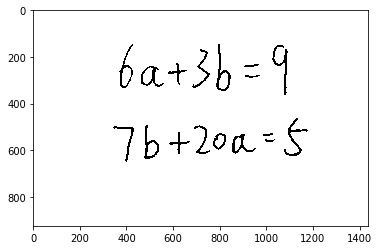

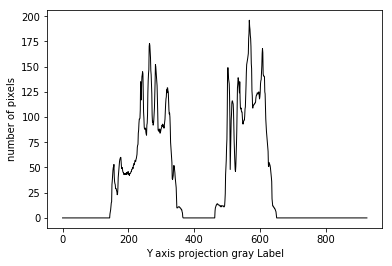

[[142, 370], [461, 654]]
(228, 1436)


TypeError: Required argument 'winname' (pos 1) not found

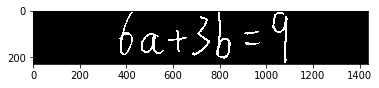

In [7]:
#计算横向直方图
def calcGrayHist(I,throhold):
    # 计算灰度直方图
    h, w = I.shape[:2]
    I = cv2.bitwise_not(I)
    plt.figure(1)
    plt.imshow(I,'Greys')
    print(I.shape)
    grayHist = np.zeros([w], np.uint64)
    grayHist = np.sum(I,axis=1)
    for i in range(h):
        grayHist[i] = grayHist[i]/255
    x = np.arange(h)
    total = 0
    total_num = 0
    for i in range(h):
        if grayHist[i] > 0:
            total_num+=1
            total += grayHist[i]
    total /= total_num
    total /= 2
    print(total)
    plt.figure(2)
    plt.plot(x, grayHist, 'r', linewidth=1, c='black')
    plt.xlabel("Y axis projection gray Label")
    plt.ylabel("number of pixels")
    plt.show()
    FormulaList = []
    startLowPoint = 0
    endLowPoint = 0
    pointHeight = 0
    traceFlag = False
    for i in range(h):
        if traceFlag == False:
            if grayHist[i]>0:
                traceFlag = True
                startLowPoint = i
        else:
            if pointHeight < grayHist[i]:
                pointHeight = grayHist[i]
            if i+1 > len(grayHist)-1:
                traceFlag = False
                endLowPoint = i
                continuePointNumber = 0
                pointHeight = 0
                continue
            if grayHist[i]==0 and grayHist[i+1] == 0:
                traceFlag = False
                endLowPoint = i
                if pointHeight > total:
                    FormulaList.append([max(startLowPoint-2,0),min(endLowPoint+2,h-1)+2])
                continuePointNumber = 0
                pointHeight = 0
    return FormulaList
hei = calcGrayHist(thresh1,grayHist)
print(hei)
h, w = thresh1.shape[:2]
label = 0
temp_image = thresh1[hei[label][0]:hei[label][1],0:w]
print(temp_image.shape)
plt.figure(3)
plt.imshow(temp_image,'Greys')
# 绘制灰度直方图
cv2.imshow('asfa',temp_image)
cv2.waitKey(0)
cv2.destroyWindow()

(228, 1436)


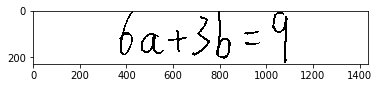

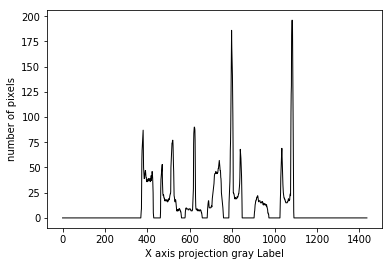

total: 15.3896484375


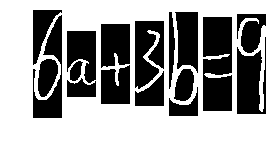

In [8]:
#计算纵向直方图
def calcGrayHist(I,throhold):
    # 计算灰度直方图
    h, w = I.shape[:2]
    I = cv2.bitwise_not(I)
    plt.figure(1)
    plt.imshow(I,'Greys')
    print(I.shape)
    grayHist = np.zeros([h], np.uint64)
    grayHist = np.sum(I,axis=0)
    for i in range(w):
        grayHist[i] = grayHist[i]/255
    x = np.arange(w)
    # 绘制灰度直方图
    plt.figure(2)
    plt.plot(x, grayHist, 'r', linewidth=1, c='black')
    plt.xlabel("X axis projection gray Label")
    plt.ylabel("number of pixels")
    plt.show()
    total = 0
    total_num=0
    for i in range(w):
        if grayHist[i] > 0:
            total_num+=1
            total += grayHist[i]
    total /= total_num
    total /= 2
    print("total:",total)
    FormulaList = []
    startLowPoint = 0
    endLowPoint = 0
    pointHeight = 0
    continuePointNumber = 0
    traceFlag = False
    for i in range(w):
        if traceFlag == False:
            if grayHist[i]>0:
                continuePointNumber = 0
                traceFlag = True
                startLowPoint = i
        else:
            continuePointNumber+=1
            if pointHeight < grayHist[i]:
                pointHeight = grayHist[i]
            if grayHist[i]<=0 and grayHist[i+1] <= 0:
                traceFlag = False
                endLowPoint = i
                if (pointHeight + continuePointNumber) >= total:
                    FormulaList.append([startLowPoint,endLowPoint])
                continuePointNumber = 0
                pointHeight = 0
    return FormulaList

def splitNumberForHorizen(L,grayHist):
    FormulaList = calcGrayHist(L,grayHist)
    singleNumber = []
    num_len = np.array(FormulaList).shape[0]
    y_axis = num_len/10+1
    plt.figure()
    for i in range(np.array(FormulaList).shape[0]):
        h, w = L.shape[:2]
        tm = L[0:h,FormulaList[i][0]:FormulaList[i][1]]
        singleNumber.append(tm)
        plt.subplot(y_axis,10,i+1)
        plt.imshow(tm,'Greys')
        plt.axis('off')
    return singleNumber

hei = splitNumberForHorizen(temp_image,grayHist)

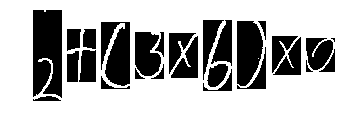

In [11]:
def calcGrayHist(I):
    # 计算灰度直方图
    h, w = I.shape[:2]
    I = cv2.bitwise_not(I)
    grayHist = np.zeros([w], np.uint64)
    grayHist = np.sum(I,axis=1)
    for i in range(h):
        grayHist[i] = grayHist[i]/255
    total = 0
    total_num = 0
    for i in range(h):
        if grayHist[i] > 0:
            total_num+=1
            total += grayHist[i]
    total /= total_num
    total /= 4
    x = np.arange(h)
#     plt.figure(2)
#     plt.plot(x, grayHist, 'r', linewidth=1, c='black')
#     plt.xlabel("gray Label")
#     plt.ylabel("number of pixels")
#     plt.show()
    FormulaList = []
    startLowPoint = 0
    endLowPoint = 0
    startTraceFlag = False
    endTraceFlag = False
    
    
#     for i in range(h):
#         startIndex = i
#         endIndex = h-i-1
#         if startTraceFlag == False:
#             if grayHist[startIndex] > total:
#                 startTraceFlag = True
#                 startLowPoint = startIndex
#         if endTraceFlag == False:
#             if grayHist[endIndex] > total:
#                 endTraceFlag = True
#                 endLowPoint = endIndex
    return max(startLowPoint-1,0),min(endLowPoint+1,h-1)+1

def calcFormulaHist(numberList):
    singleNumber = []
    cout = 5
    plt.figure()
    num_len = len(numberList)
    y_axis = num_len/10+1
    cout = 0
    for nl in numberList:
        h , w = np.array(nl).shape
        sp,ep = calcGrayHist(nl)
        ig = nl[sp:ep,0:w]
        cout+=1
        plt.subplot(y_axis,10,cout)
        plt.imshow(ig,'Greys')
        plt.axis('off')
        singleNumber.append(ig)
    return singleNumber
didi = calcFormulaHist(hei)

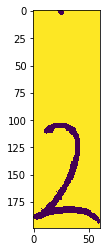

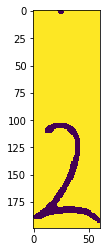

In [25]:
import  cv2
import tkinter
import numpy as np
from matplotlib import pyplot as plt

#定义线性增强函数，<x1,x2>为增强区间
def linear_threshold(Image,h,w,x1,x2,z2,z1 = 0,z3 = 0):

    for i in range(0, h):
        for j in range(0, w):
            tmp = Image[i, j]
            if tmp < x1:
                Image[i, j] = z1
            elif tmp >= x1 and tmp < x2:
                Image[i, j] = z2
            else:
                Image[i, j] = z3

    return Image

#轮廓面积计算函数
def areaCal(contour):

    area = 0
    for i in range(len(contour)):
        area += cv2.contourArea(contour[i])

    return area

#读入图片
img = hei[0]
#设置掩模，将处理图像聚焦到夹层处
mask = np.zeros(img.shape[:2],np.uint8)
#中值滤波

plt.figure()
plt.imshow(img)
plt.figure()
plt.imshow(median1)